# TOLNet Toolbox
Authors: Maurice Roots, Arthur Perng

Advisor: John Sullivan

This notebook details how to use the TOLNet API to fetch and plot ozone data with various filters, such as processing type and instrument group/location. In addition, a section is included for fetching GEOS CF ozone profiles for comparison. Future work will incorporate analysis efforts and notebooks per community requests, for instance to better characterize future products from the TEMPO instrument. 

Please send any questions or comments to John Sullivan (john.t.sullivan@nasa.gov).

For more information on TOLNet, visit https://tolnet.larc.nasa.gov/




## Table of Contents:
- Overview
- Example Case Study
- Python package overview
    - Additional plotting parameters
- Comparison with GEOS CF data
- Table of Lidar Locations

## Overview <a class="anchor" id="tolnet_overview"></a>

The Tropospheric Ozone Lidar Network (TOLNet) is an interagency network initiated by NASA, NOAA, and EPA in 2011 with the goal of enhancing our tropospheric ozone measurement capabilities. Ozone lidars within TOLNet provide accurate observations under both daytime and nighttime conditions and generate consistent, long-term datasets. Most of the instruments are portable and have been deployed previously in air quality campaigns in coordination with federal, state and local agency’s interests. 

The data is currently stored as HDF4 files, but the TOLNet API returns JSON data which we will be using in this notebook.

Charter lidar systems are affiliated with NASA GSFC, NASA LaRC, NASA Jet Propulsion Laboratory (JPL), NOAA Earth System Research Laboratory/Chemical Sciences Lab (ESRL/CSL), and the University of Alabama, Huntsville. These systems have also been developed at CCNY and Hampton University. An international collaboration with Environment and Climate Change Canada (ECCC) has also been established, as well as a modeling component at NASA Ames Research Center (ARC) and data archiving administered at NASA LaRC. 

The TOLNet data is accessible online (https://tolnet.larc.nasa.gov/) and can be accessed through this notebook. Consulting with the instrument principal or coinvestigators before usage is highly encouraged.

![title](examples/data_map.png)

## Example Case Study  <a class="anchor" id="case_study"></a>

On July 12th, 2023, the air quality in Flax Pond(Old Field, NY) was particularly poor, with an ozone index of about 133(Unhealthy for sensitive groups).  
We will use the TOLNet API to graph the ozone data at GSFC during this time.  

Then, we import it with python.

In [1]:
from tolnet import TOLNet
tolnet = TOLNet() # Creates an object that retrieves data from the API 

We only want data from the Old Field area around June 12th. As such, we filter accordingly:

In [2]:
date_start = "2023-07-11"
date_end = "2023-07-13"
group = [2] # List of instrument group IDs to filter by. We only want GSFC(ID=2), so this list only contains 2.
product_ID = [4] # Filter for high-resolution files only

tolnet.import_data(min_date=date_start, max_date=date_end, instrument_group=group, product_type=product_ID)

Then, we plot the data. One curtain plot is created for each combination of instrument group and processing type, which is two in this case.(GSFC In-house processed, GSFC centrally processed)

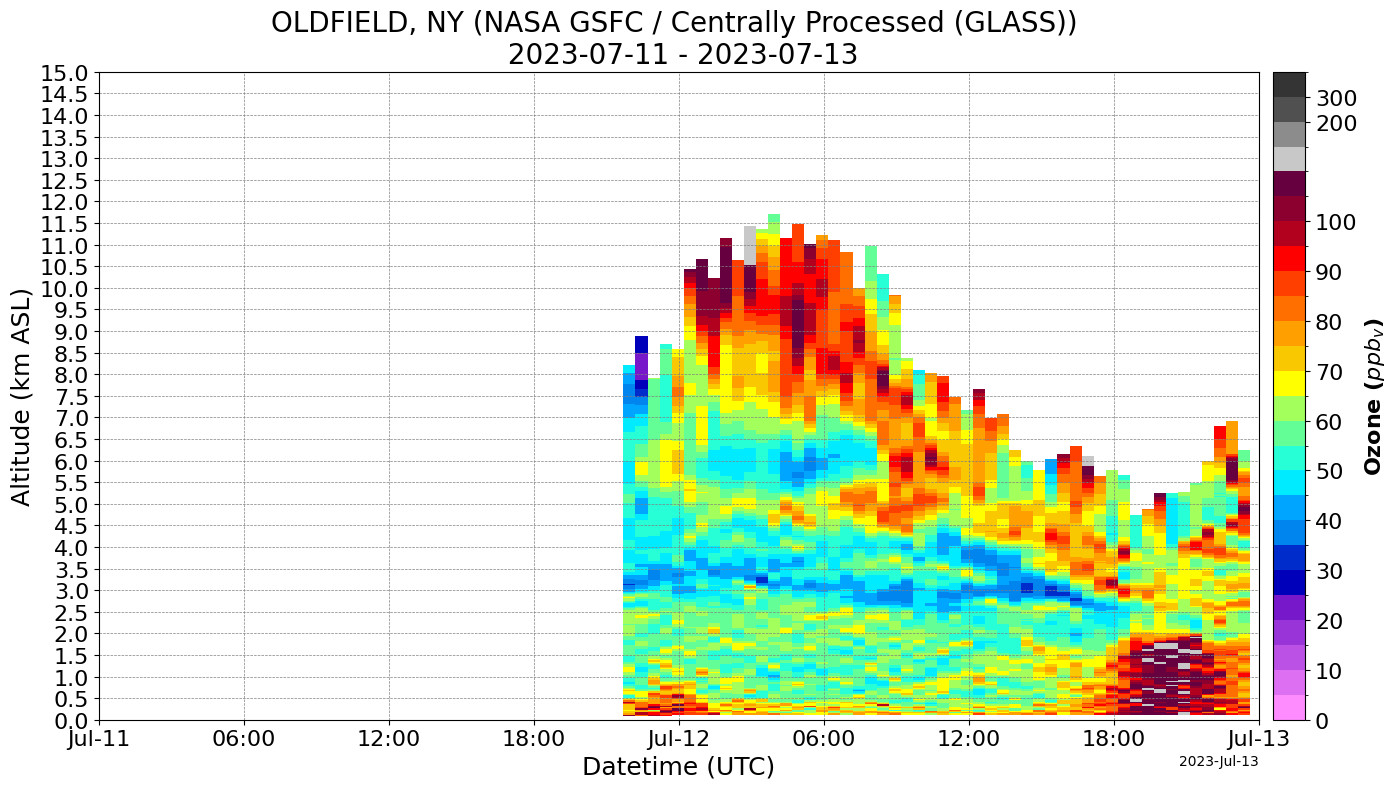

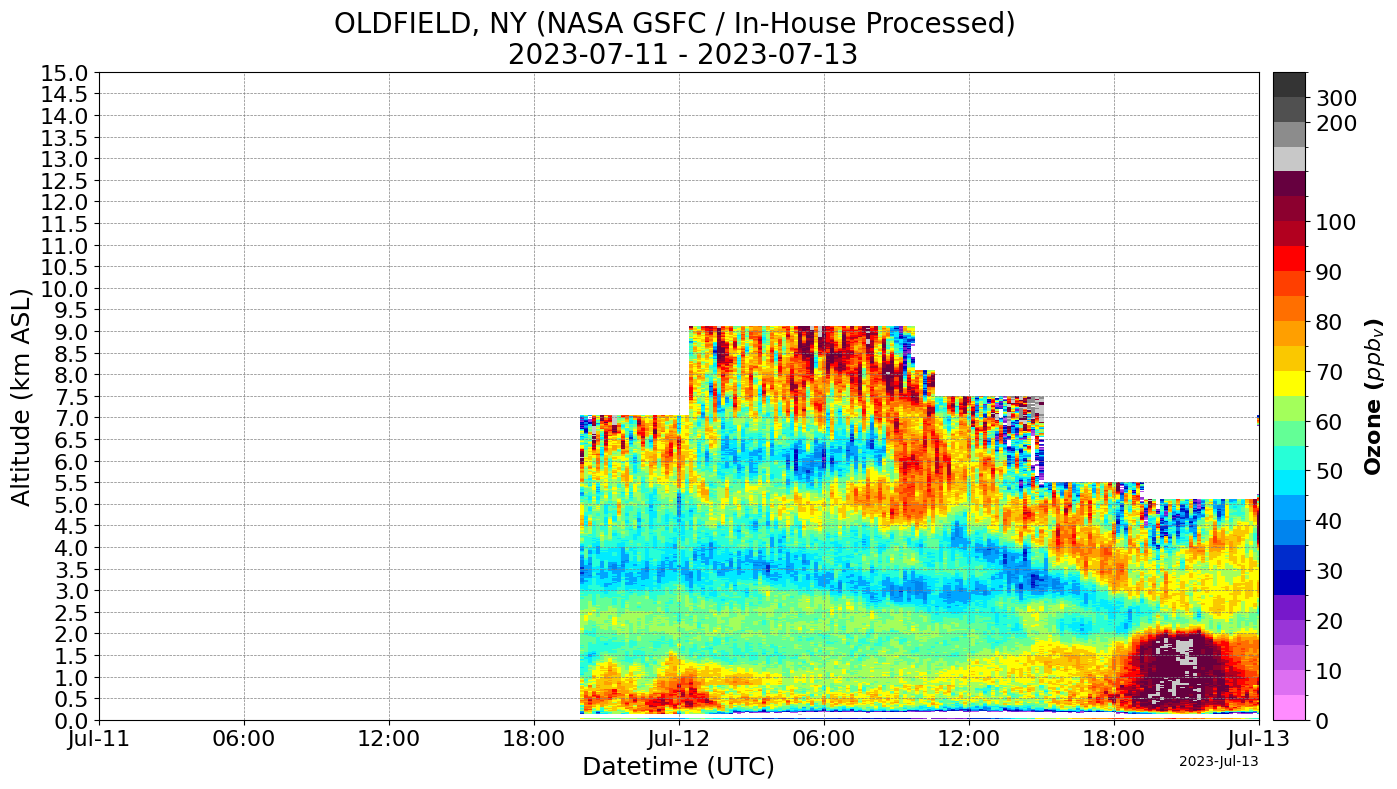

In [3]:
tolnet.tolnet_curtains()

We can see that there is an enhancement of dark red and gray on both graphs at around 6:00-12:00 PM on July 12th, signalling an ozone ppbv(parts per billion) of 100 or higher. (The EPA standard is 75 parts per billion, and any more is considered unhealthy.) This corresponds to the worsened air quality index on that day.

## Package Overview <a class="anchor" id="package_overview"></a>

In [4]:
from tolnet import TOLNet
tolnet = TOLNet() # tolnet now refers to an object that is capable of retrieving data from the API

Each of these functions prints the ID of each parameter you can filter by. It is recommended to filter your query by product type = 4(HIRES), as processing other products is not supported at this time.

In [5]:
# Prints querible parameters.
tolnet.print_product_types()
# tolnet.print_processing_types()
# tolnet.print_instrument_groups()
# tolnet.print_file_types()


 TOLNET product IDs:
 id product_type_name                                                         description
  1           O3Lidar                  Vertical profiles of ozone using a lidar technique
  2           Surface                            In-situ measurements of surface products
  3             Other        Data that is not ozone lidar or surface in-situ measurements
  4             HIRES                       Highest temporal and vertical resolution data
  5            CALVAL Optimized for specific comparative evaluation of satellite or sonde
  6              CLIM                        Optimized for climatology and trends studies
  7           Gridded    Regridded HIRES data to a common TOLNet-wide grid for evaluation
  8            Legacy      generic HDF or TOLNet ASCII data products (Contact PI for use) 



In [6]:
date_start = "2023-08-08" # YYYY-MM-DD format in a string
date_end = "2023-08-11"
product_IDs = [4] # HIRES

# Fetches data using the TOLNet object. min_date and max_date are required, but other parameters are optional.
# Once finished, this function stores the data in the object(tolnet in this case). The data can be accessed with tolnet.data and tolnet.meta_data.
# This will prompt the user for confirmation if the query would download every file from the API.
# Querible parameters are processing_type, instrument_group, product_type, and file_type. 
# All parameters require a list of IDs to filter for.
data = tolnet.import_data(min_date=date_start, max_date=date_end, product_type=product_IDs)

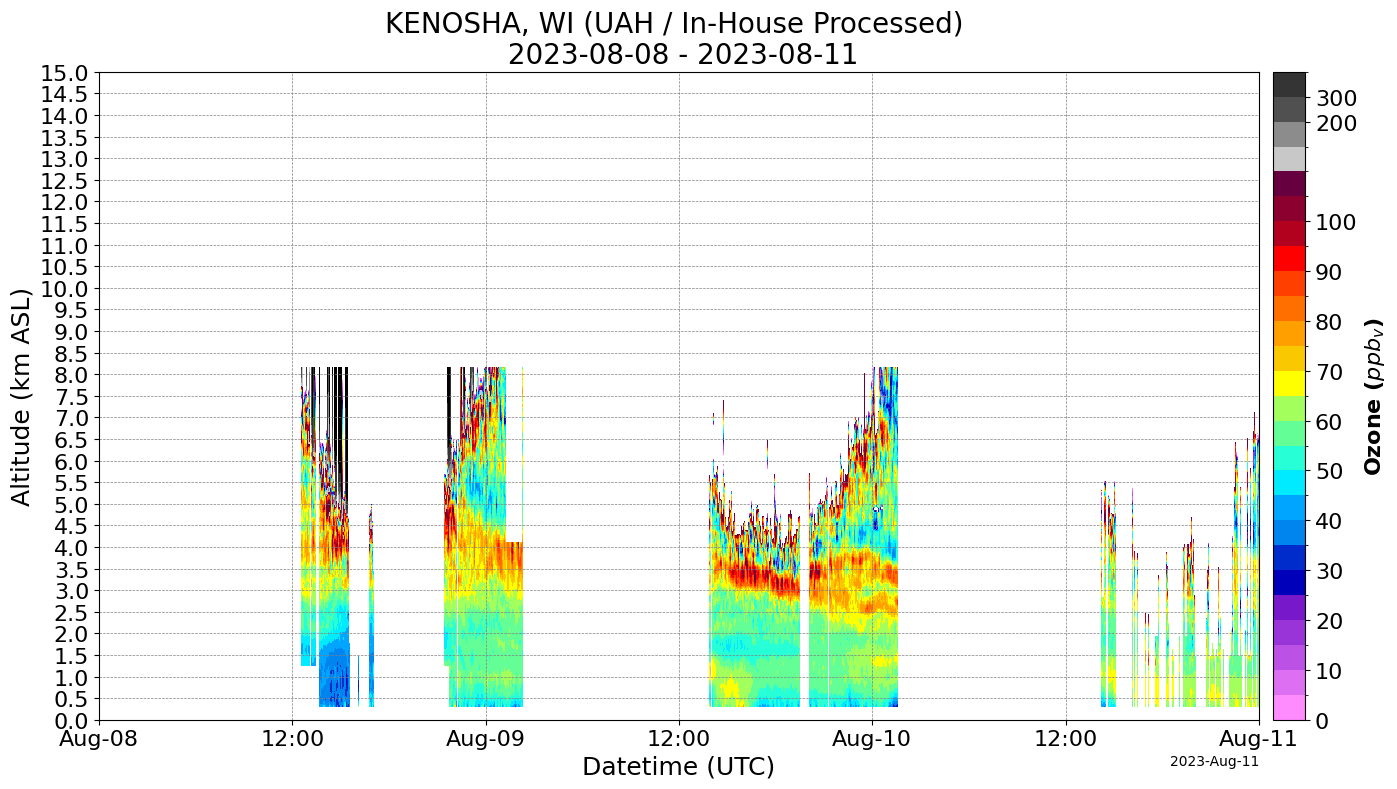

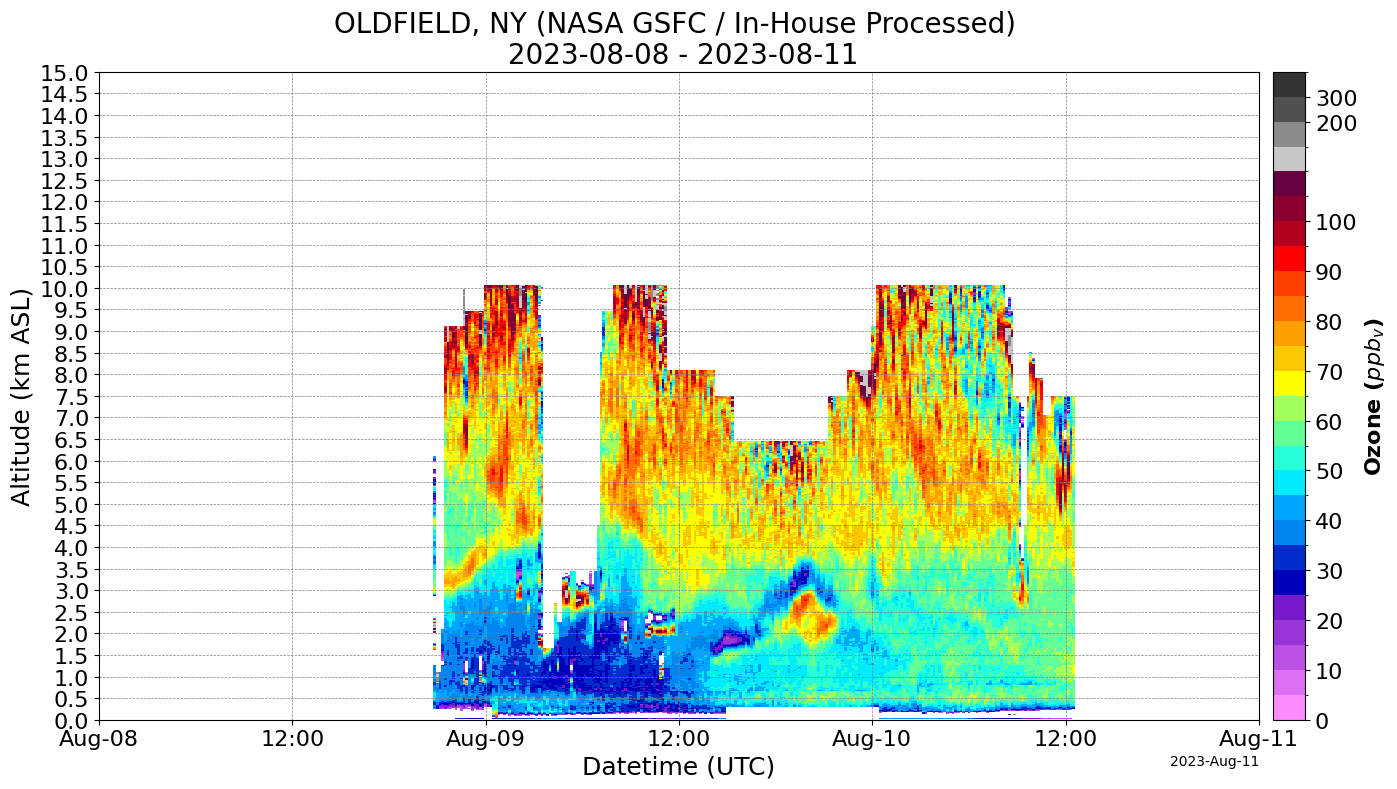

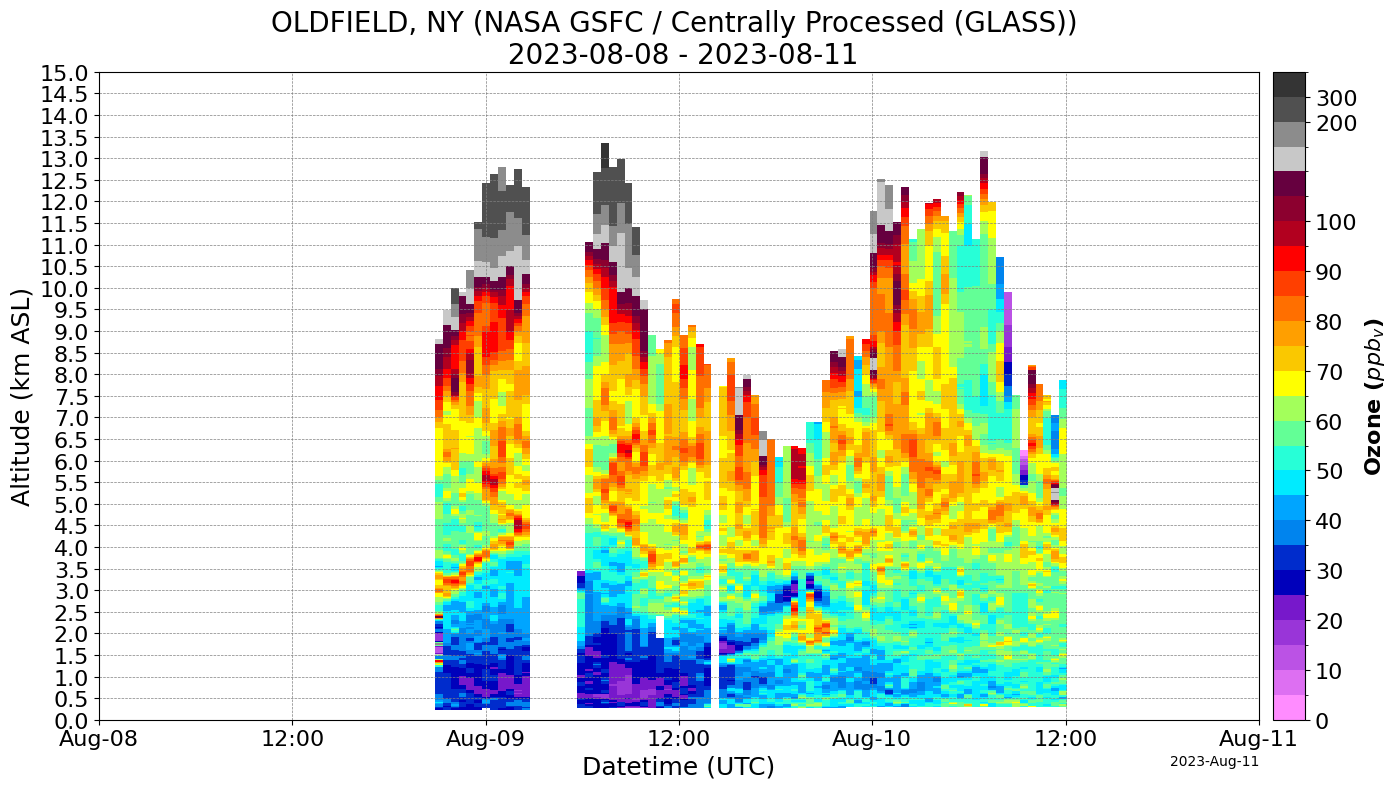

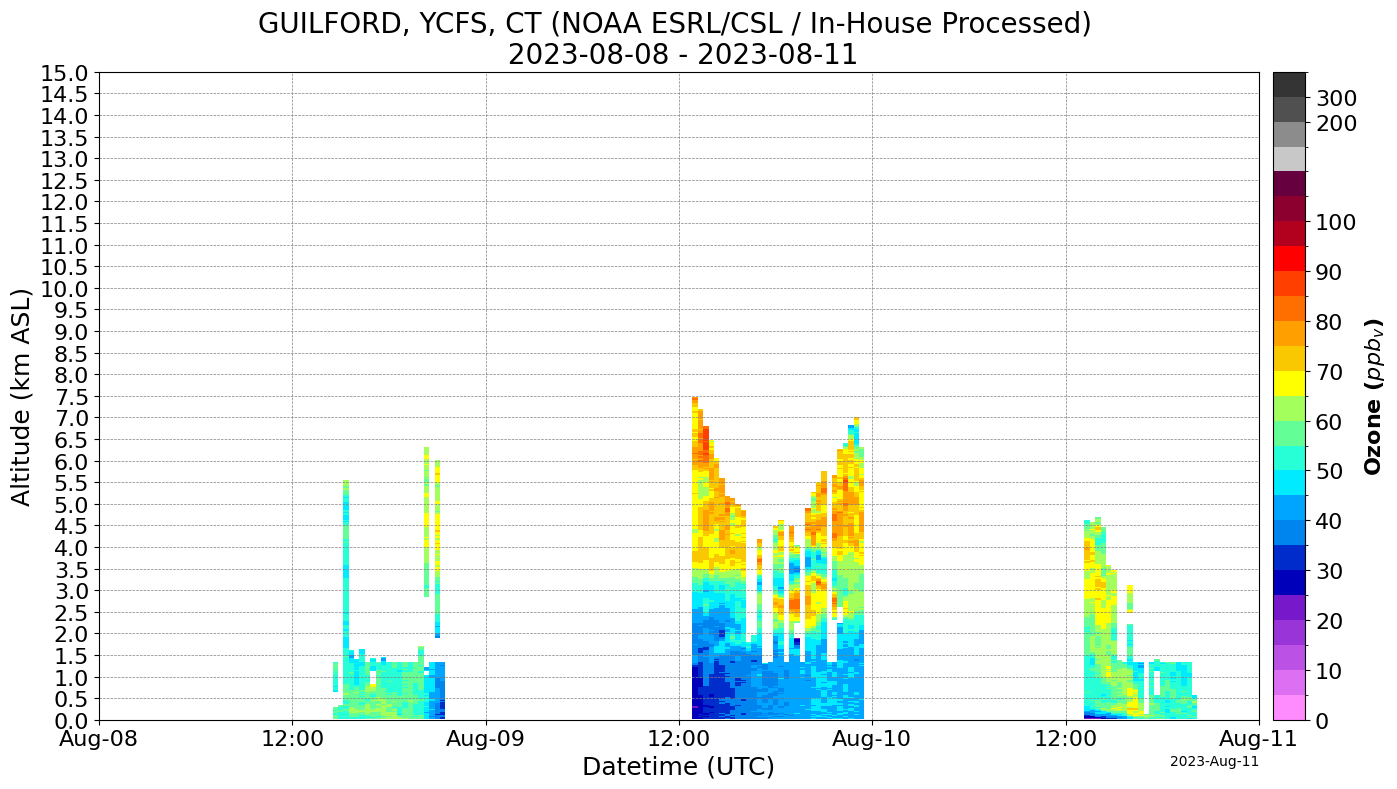

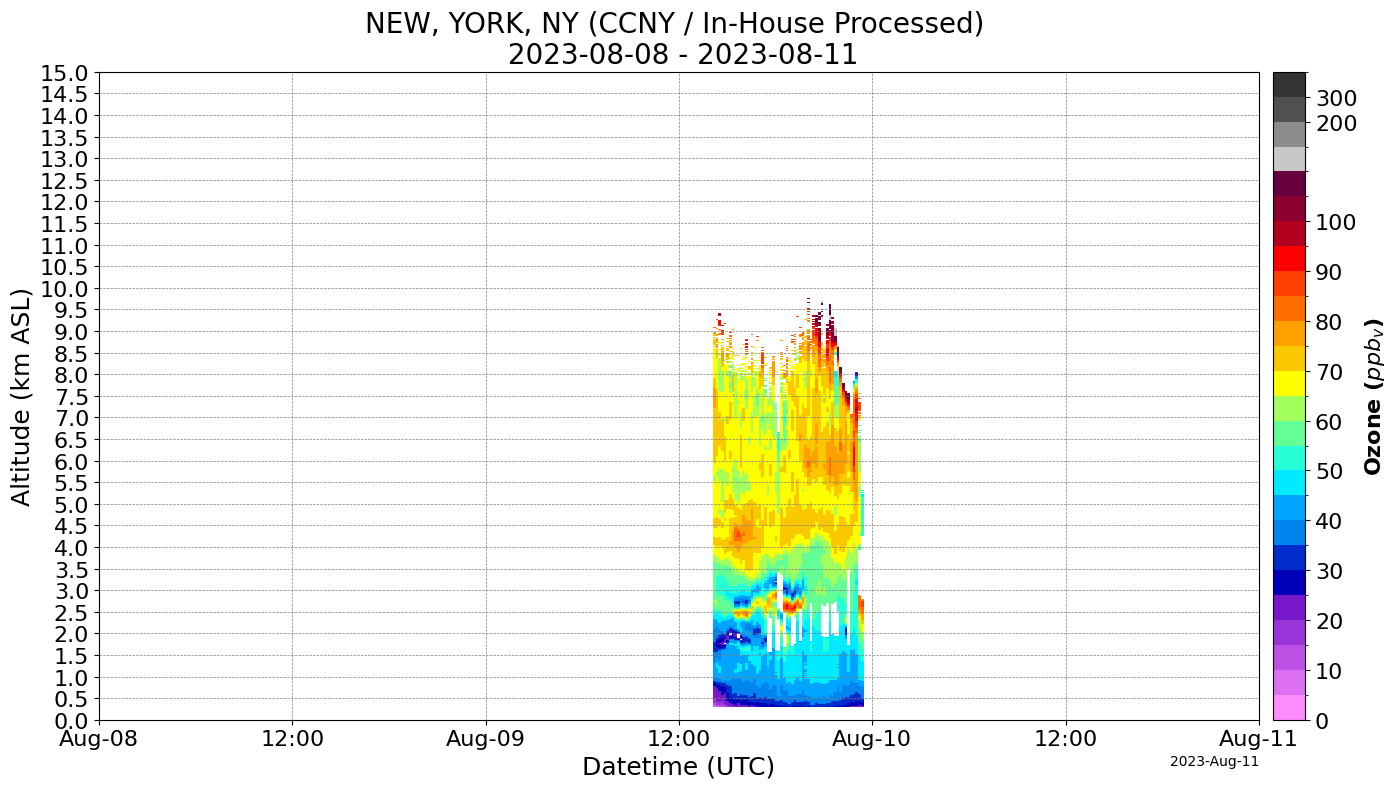

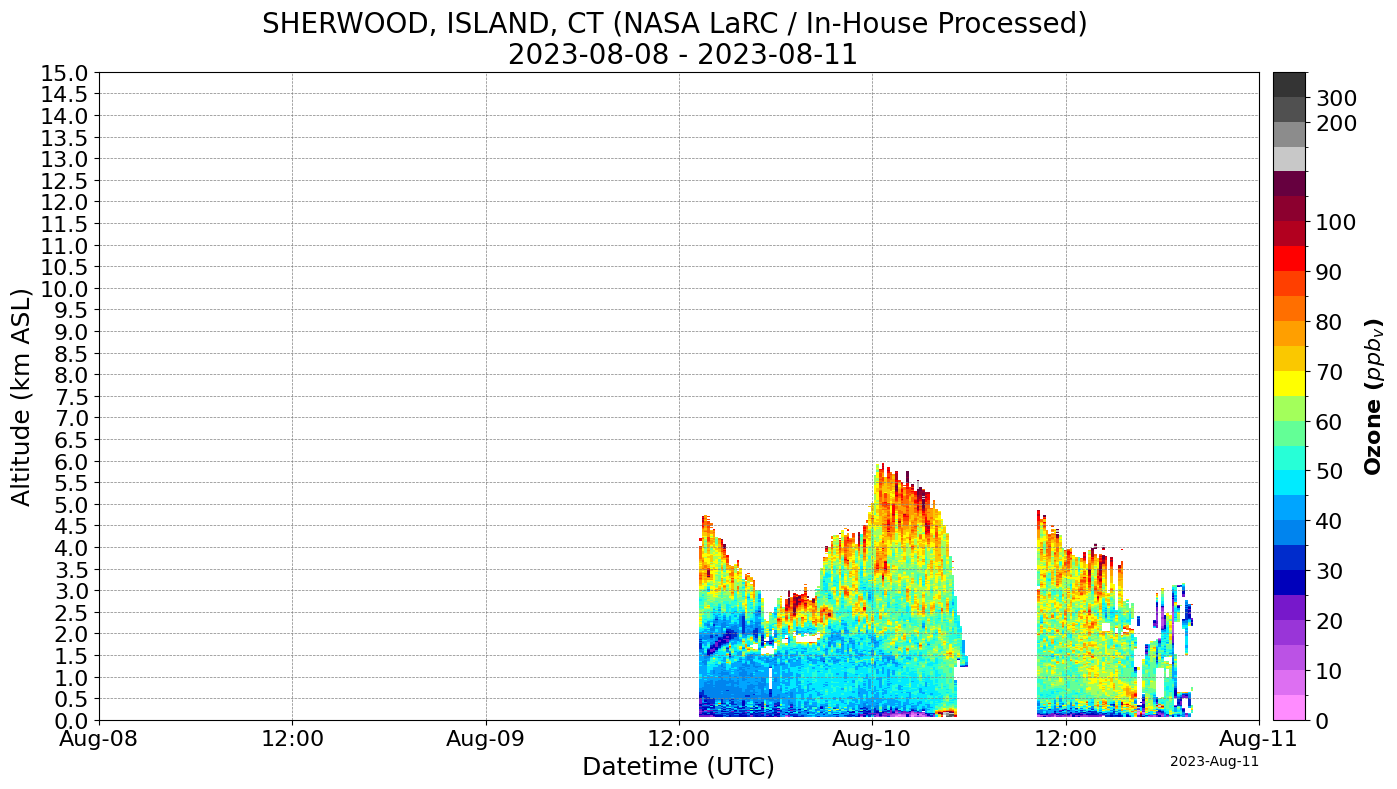

In [7]:
# Plots the data, used after import_data. Puts each combination of instrument group and processing type on a seperate plot.
data.tolnet_curtains()

### Additional parameters for plotting

The tolnet_curtains function can also take the following arguments: `title`, `ylabel`, `xlabel`, `xlims`, `ylims`, `yticks`, and `savefig`. Below are some examples. 



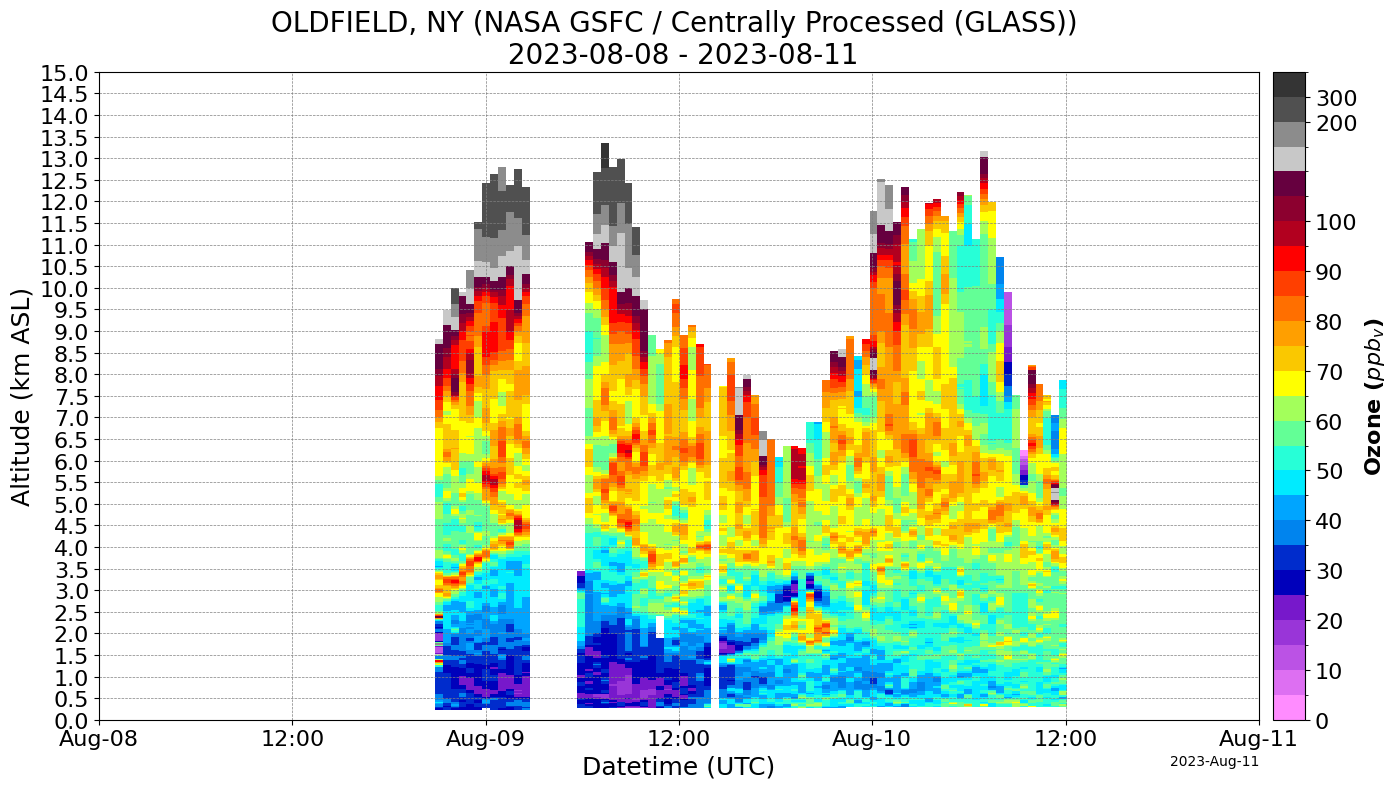

In [8]:
# Copy of previous query for sample data
tolnet = TOLNet()

params = {"min_date": "2023-08-08",
          "max_date": "2023-08-11",
          "product_type": [4],
          "instrument_group": [2],
          "processing_type": [1]
         }

# central_processing = [1] # Filtering to only centrally processed data so that only 1 graph is created
data = tolnet.import_data(**params).tolnet_curtains()

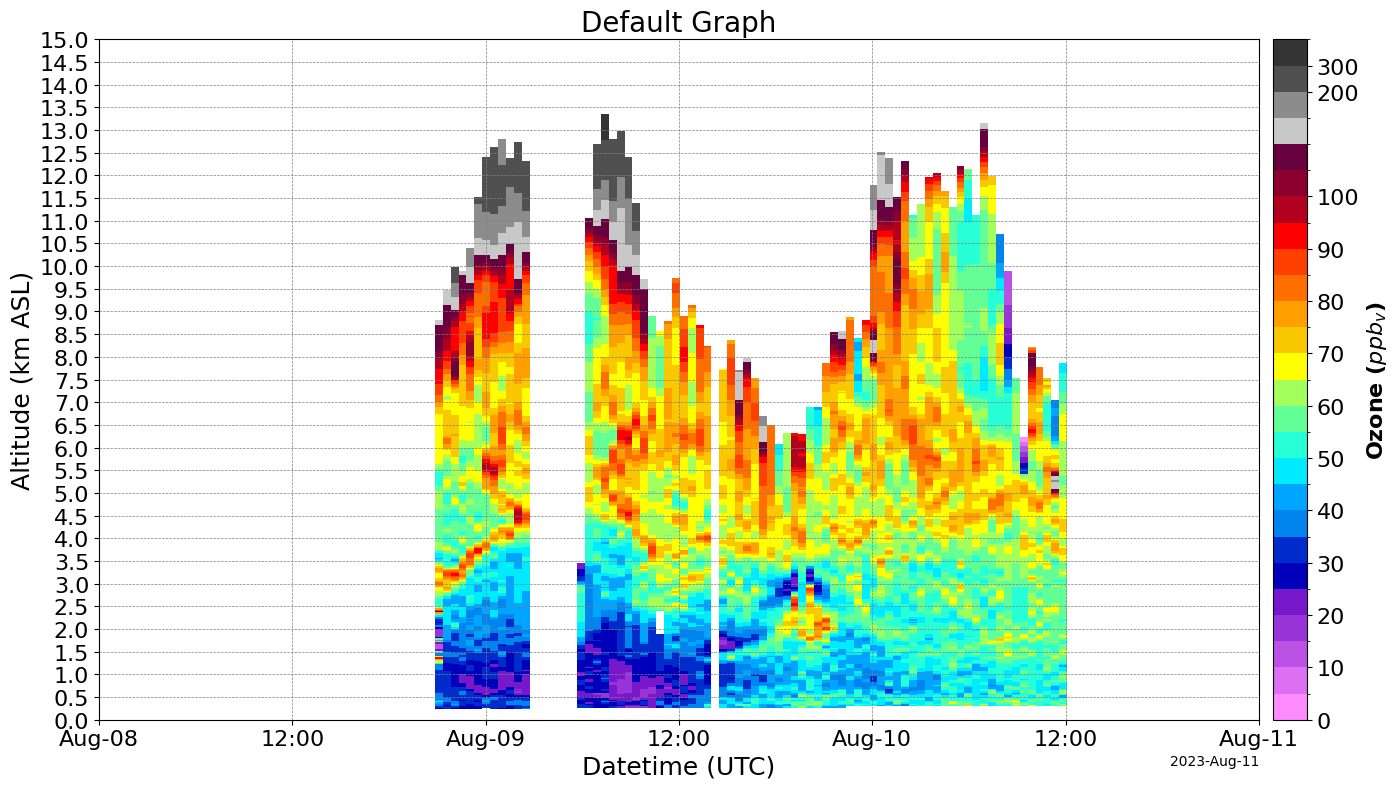

In [9]:
data.tolnet_curtains(title="Default Graph")

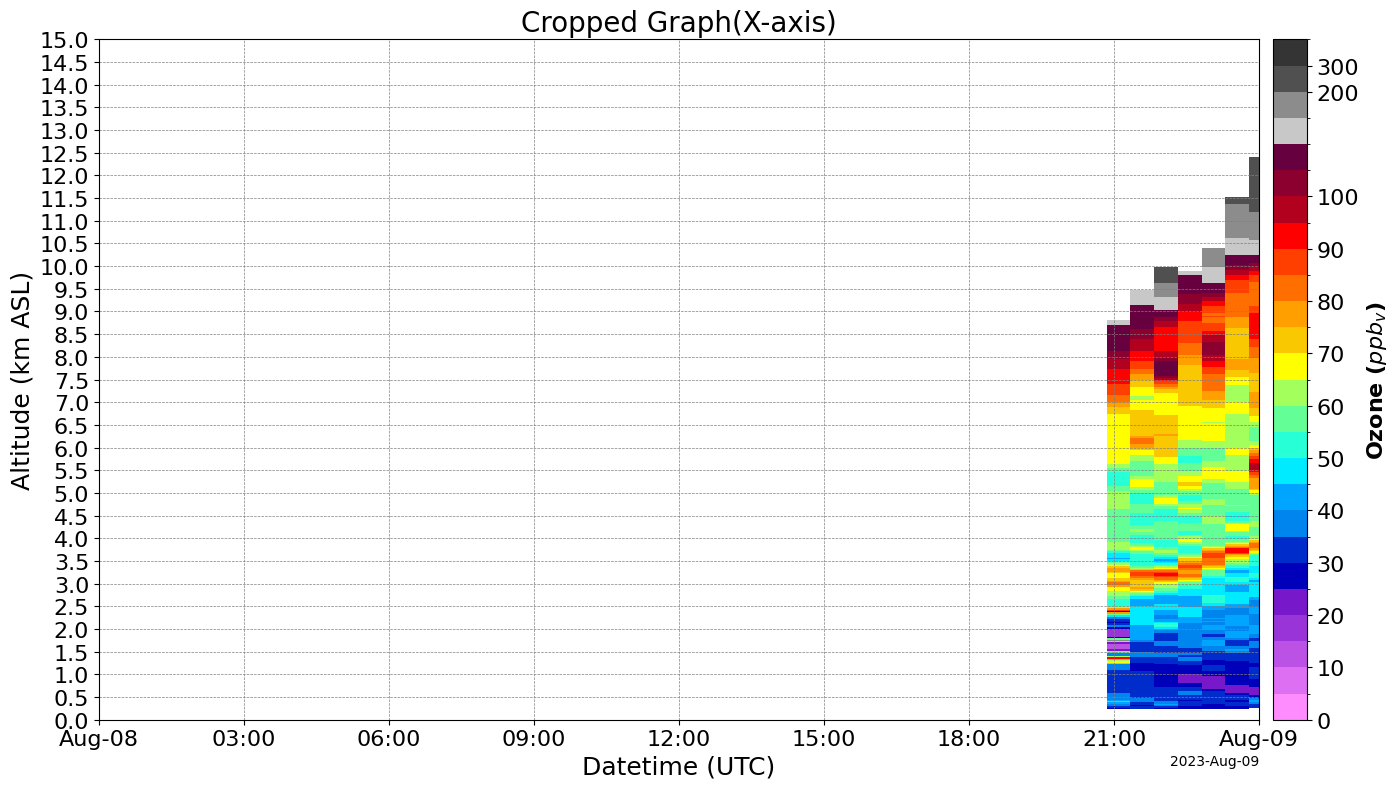

In [10]:
# xlims takes a list of two dates in ISO 8601 Format(YYYY-MM-DD), like this: ['2023-08-05', '2023-08-08'].  
data.tolnet_curtains(xlims=['2023-08-08', '2023-08-09'], title="Cropped Graph(X-axis)")

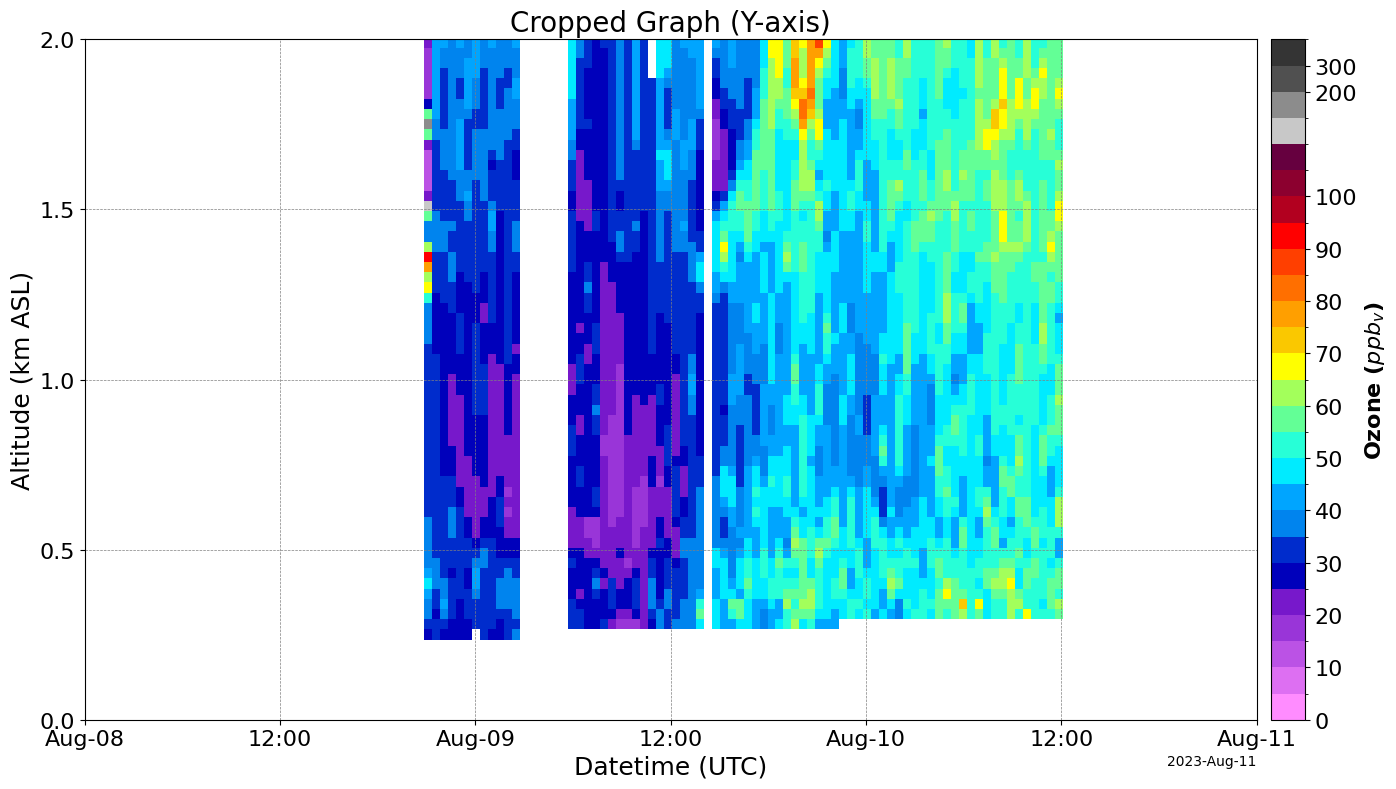

In [11]:
data.tolnet_curtains(ylims=[0, 2], title="Cropped Graph (Y-axis)")

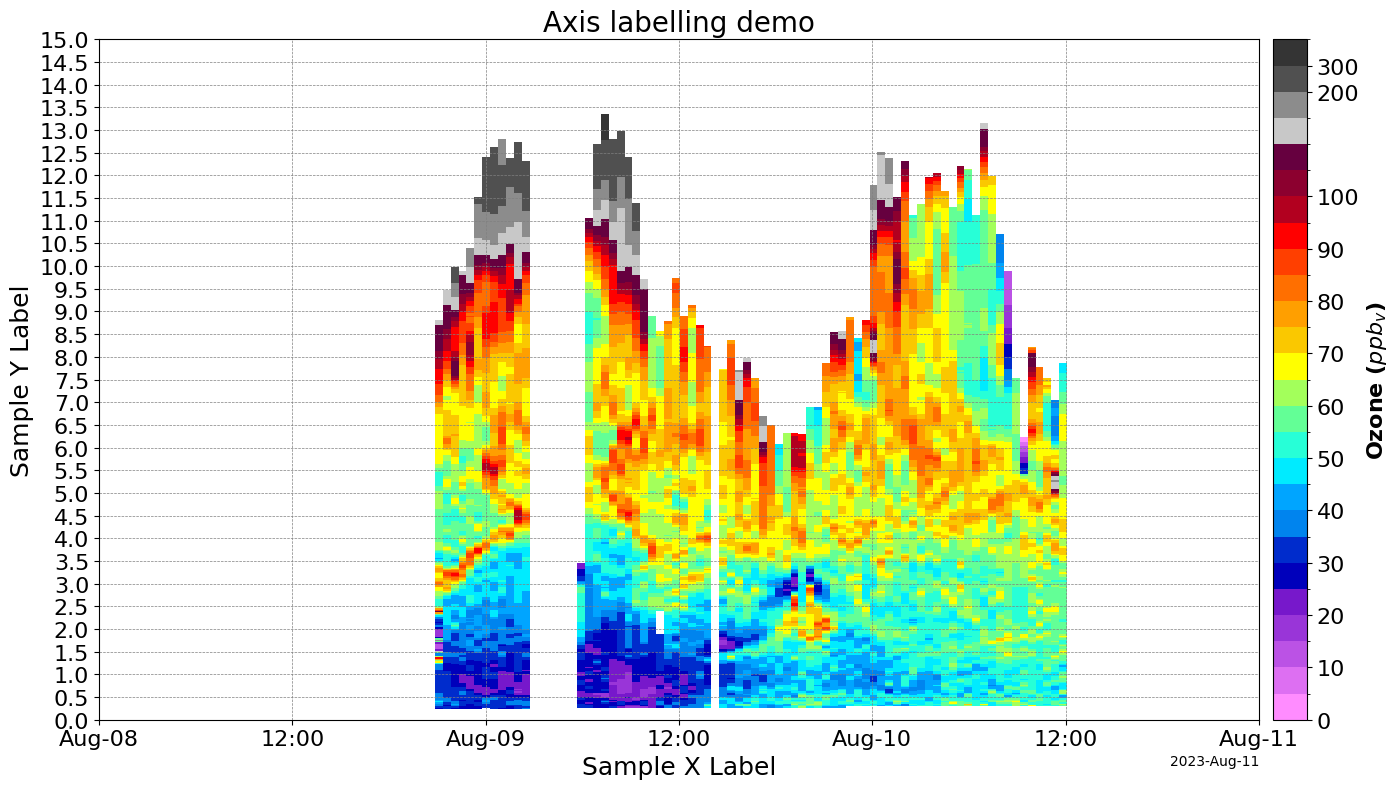

In [12]:
data.tolnet_curtains(xlabel="Sample X Label", ylabel="Sample Y Label", title="Axis labelling demo")

Adding `savefig=True` saves each created figure to a file. Each figure is saved in a file named `(Instrument Group)_(Processing type)_(Start date)_(End date).png`. For example, the above query that creates one graph would be saved as `NASA_GSFC_Centrally_Processed_(GLASS)_2023_08_08_2023_08_11.png`.

### Accessing data directly

In [13]:
# The data can also be accessed directly from the object.
tolnet.data.keys() # Returns each combination of instrument group and processing type that there is data for.
# This combination also includes an entry for 'dates', which stores the queried date range and is the default 

dict_keys([('NASA GSFC', 'Centrally Processed (GLASS)', '40.96x-73.14')])

In [14]:
sample_key = list(tolnet.data.keys())[-1] # sample_key is now a tuple containing a combination of instrument group and processing type
tolnet.data[sample_key].keys() # Returns each filename with the specified group and type.

dict_keys(['2023-08-10', '2023-08-09', '2023-08-08'])

In [15]:
sample_file = list(tolnet.data[sample_key].keys())[0]
tolnet.data[sample_key][sample_file].head(10) # Returns a DataFrame containing the data for that file.

,0.1005,0.1305,0.1605,0.1905,0.2205,0.2505,0.2805,0.3105,0.3405,0.3705,...,12.8805,12.9105,12.9405,12.9705,13.0005,13.0305,13.0605,13.0905,13.1205,13.1505
2023-08-10 00:15:28+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.4,49.4,50.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 00:45:25+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3,45.5,46.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 01:15:23+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,40.3,42.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 01:45:30+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.5,49.2,56.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 02:15:37+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.7,37.7,46.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 02:45:34+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.9,53.2,49.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 03:15:31+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.1,47.5,46.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 03:45:28+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.9,54.5,51.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 04:15:25+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7,53.2,48.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 04:45:22+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.7,56.8,56.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_file = list(tolnet.meta_data[sample_key].keys())[0] # Returns a dictionary containing that file's metadata.
metadata = tolnet.meta_data[sample_key][sample_file]

# Remove the data section so that only the metadata is printed, not all of the data which floods the output with thousands of lines
if 'data' in metadata['value']:
    del metadata['value']['data']
if 'data' in metadata['altitude']:
    del metadata['altitude']['data'] 
if 'data' in metadata:
    del metadata['data']
    
metadata

{'fileInfo': {'file_name': 'groundbased_lidar.o3_nasa.gsfc003_hires.glass.1.1_oldfield.ny_20230810t000009z_20230810t123041z_001.hdf',
  'file_size': 676227,
  'isAccessible': True,
  'start_data_date': '2023-08-10 00:00:09',
  'end_data_date': '2023-08-10 12:30:41',
  'upload_date': '2024-05-01 08:51:53.737688',
  'instrument_group_name': 'NASA GSFC',
  'instrument_latitude': 40.96,
  'instrument_longitude': -73.14,
  'instrument_altitude': 3,
  'doi': '10.5067/Lidar/Ozone/TOLNet/NASA-GSFC',
  'citation_url': 'https://asdc.larc.nasa.gov/project/TOLNet/TOLNet_GSFC_Data_1/citation',
  'product_type_name': 'HIRES',
  'processing_type_name': 'Centrally Processed (GLASS)',
  'file_type_name': 'HDF GEOMS (Standard)',
  'revision': 1,
  'near_real_time': 'f'},
 'altitude': {'attributes': {'VAR_DESCRIPTION': 'Altitude above sea level (km)',
   'VAR_VALID_MIN': -0.3,
   'VAR_VALID_MAX': 120,
   'VAR_UNITS': 'km',
   'VAR_FILL_VALUE': -999}},
 'datetime': {'attributes': {'VAR_DESCRIPTION': 'Weig

## Comparison with GEOS CF <a class="anchor" id="comparison_geos_cf"></a>


The package also supports fetching and plotting from the GEOS-CF API.

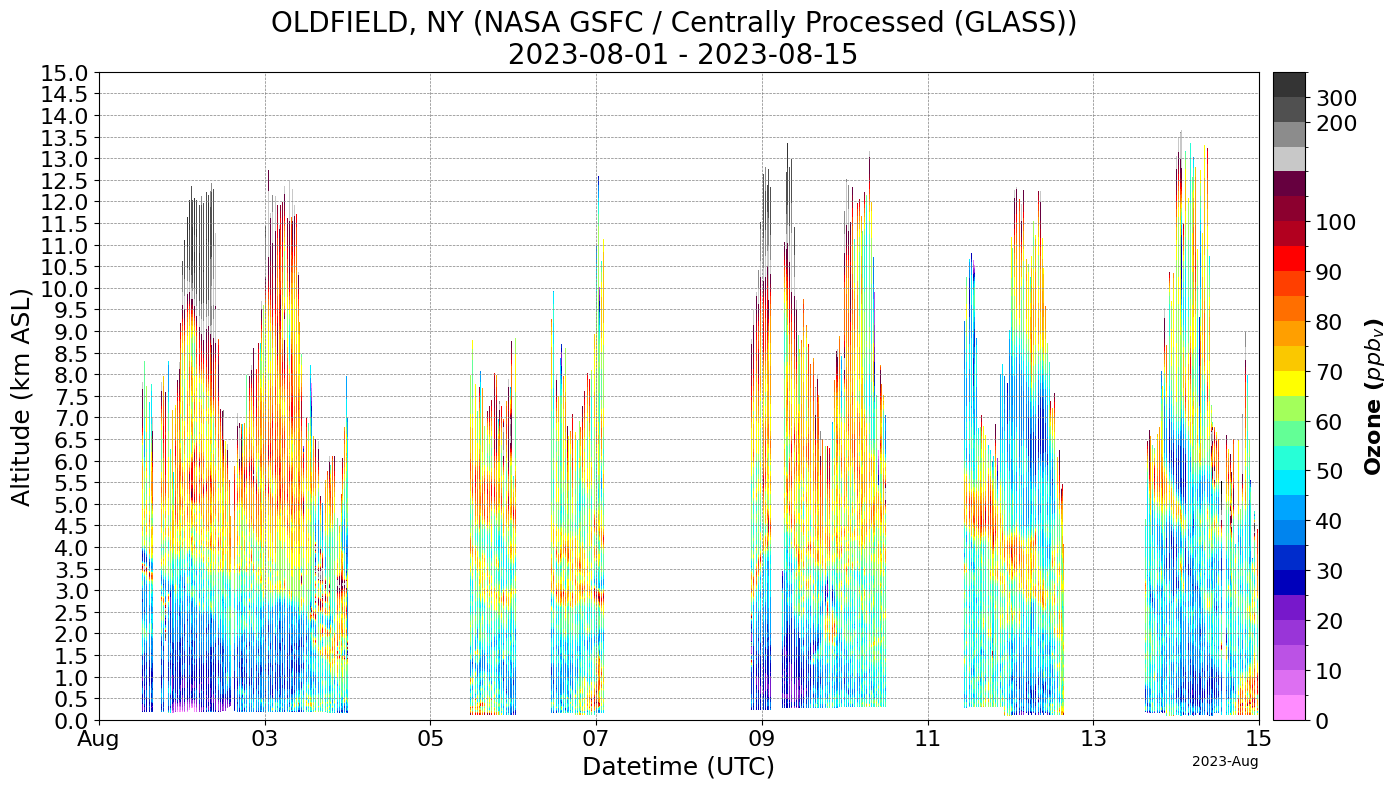

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


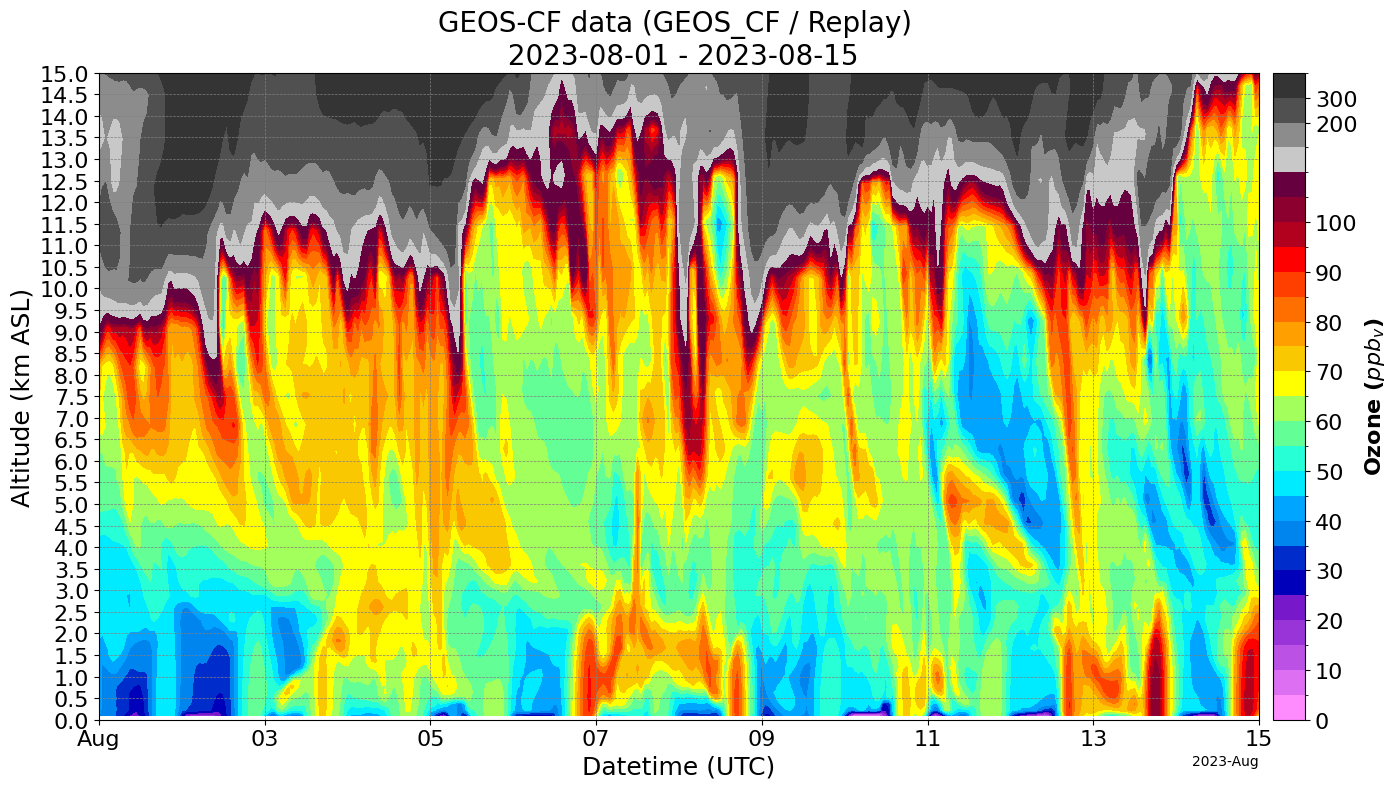

In [17]:
# Copy of previous query for sample data
from tolnet import TOLNet
tolnet = TOLNet()

params = {"min_date": "2023-08-01",
          "max_date": "2023-08-15",
          "product_type": [4],
          "instrument_group": [2],
          "processing_type": [1],
          "GEOS_CF": True
         }

data = tolnet.import_data(**params).tolnet_curtains()

### Table of Lidar Locations
|                             Location |     Mode | Instrument Group Name |              Date Range | Latitude | Longitude |   |
|-------------------------------------:|---------:|----------------------:|------------------------:|---------:|----------:|---|
|           Albuquerque Fiesta Park NM | Campaign |       NASA JPL SMOL-1 | 2023-10-11 - 2023-10-15 |    35.19 |   -106.56 |   |
|                               Cabauw | Campaign |       NASA JPL SMOL-1 | 2024-05-22 - 2024-06-09 |    51.97 |      4.93 |   |
|                               Cabauw | Campaign |             NASA GSFC | 2019-09-12 - 2019-10-02 |    51.97 |      4.93 |   |
|                          Fort Mackay | Campaign |                  ECCC | 2016-11-04 - 2019-09-23 |    57.19 |   -111.62 |   |
|                     Guilford YCFS CT | Campaign |         NOAA ESRL/CSL | 2023-07-04 - 2023-08-14 |    41.25 |    -72.75 |   |
|                        Huntsville AL | Campaign |                   UAH | 2022-07-08 - 2022-07-10 |    30.27 |    -88.12 |   |
|                           Kenosha WI | Campaign |                   UAH | 2023-07-18 - 2023-08-16 |    42.50 |    -87.81 |   |
|                          La Porte TX | Campaign |             NASA GSFC | 2021-08-11 - 2021-09-28 |    29.67 |    -95.06 |   |
|           Langley Research Center VA | Campaign |             NASA LaRC | 2018-01-24 - 2024-07-05 |    37.09 |    -76.38 |   |
|                      Pasadena JPL CA | Campaign |       NASA JPL SMOL-1 | 2023-06-25 - 2023-09-07 |    34.19 |   -118.19 |   |
|           San Bernardino Calstate CA | Campaign |       NASA JPL SMOL-2 | 2023-06-23 - 2023-12-16 |    34.19 |   -117.31 |   |
|                   Sherwood Island CT | Campaign |             NASA LaRC | 2018-07-12 - 2023-08-26 |    41.12 |    -73.31 |   |
| University Of Houston Moody Tower TX | Campaign |             NASA LaRC | 2021-08-26 - 2021-09-27 |    29.72 |    -95.31 |   |
|                        Beltsville MD |  Routine |             NASA GSFC | 2015-06-10 - 2022-07-28 |    39.06 |    -76.88 |   |
|                           Boulder CO |  Routine |         NOAA ESRL/CSL | 2018-02-08 - 2023-10-23 |    40.00 |   -105.25 |   |
|       Goddard Space Flight Center MD |  Routine |             NASA GSFC | 2015-02-03 - 2024-06-25 |    38.97 |    -76.81 |   |
|                        Huntsville AL |  Routine |                   UAH | 2017-07-31 - 2023-04-20 |    34.72 |    -86.62 |   |
|                          New York NY |  Routine |                  CCNY | 2023-06-01 - 2024-07-11 |    40.81 |    -73.94 |   |
|                    Table Mountain CA |  Routine |        NASA JPL TMTOL | 2000-01-04 - 2024-07-10 |    34.38 |   -117.69 |   |